<a href="https://colab.research.google.com/github/antoniovitorio/Projetos/blob/master/RELATORIO_IMPRESSORA_SS_OPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULO E IMPORTAÇÕES DE BIBLIOTECAS**

In [31]:
%matplotlib inline

In [32]:
pip install pdf_reports -q

In [33]:
from datetime import datetime
from pdf_reports import pug_to_html, write_report

In [34]:
import seaborn as sns

In [35]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import csv
from matplotlib.axes import Subplot
from matplotlib.figure import Figure

# ***LOCAL DO ARQUIVO PARA ATUALIZAÇÃO DO DATAFRAME***

In [ ]:
#dataframe OPERAÇÃO
DF_OPE = pd.read_excel("/content/sample_data/planilha_ope.xlsx")
DF_OPE

In [ ]:
#dataframe ADM
DF_ADM = pd.read_excel("/content/sample_data/planilha_adm.xlsx")
DF_ADM

In [13]:
DF_OPE.rename (columns= {"User Name": "Usuario",
                        "Type": "Processo",
                       "Print Pages": "Total de Paginas",
                       "Time": "Hora",
                       "Date": "Data",
                       "Job Name": "Nome do Arquivo"	},inplace = True)

In [14]:
DF_ADM.rename (columns= {"User Name": "Usuario",
                        "Type": "Processo",
                       "Print Pages": "Total de Paginas",
                       "Time": "Hora",
                       "Date": "Data",
                       "Job Name": "Nome do Arquivo"	},inplace = True)

In [ ]:
#APRESENTA DADOS DO DATAFRAME OPERAÇÃO
DF_OPE.head()

In [ ]:
#APRESENTA DADOS DO DATAFRAME OPERAÇÃO
DF_ADM.head()

# ***OPERAÇÃO---TOTAL DE PAGINAS POR USUARIO***

In [ ]:
DF_OPE [["Usuario","Processo","Total de Paginas"]]

In [ ]:
plan_dados = DF_OPE [["Usuario","Total de Paginas"]]
plan_dados

In [ ]:
dados_agrupados=plan_dados.groupby(by="Usuario").sum()
dados_agrupados

In [39]:
nova= ['Christian.Cutrim','Cópias','Luis.Franca','Taliane.Lima','davisson.silva','graciele.gomes','marselle.ribeiro','pamela.silva','patricia.oliveira'	]

In [40]:
dados_agrupados.insert(loc=0, column="Nome",value= nova)

In [ ]:
dados_agrupados.head(10)

In [ ]:
#DADOS PARA GERAR GRAFICO 01
dados_org_op = dados_agrupados.sort_values(by='Total de Paginas')
dados_org_op

In [ ]:
#dados_para_grafico_02_para_teste
dados_grafico_02 = dados_agrupados.sort_values(by='Total de Paginas')
dados_grafico_02

In [ ]:
#grafico 01
dados_org_op.plot('Nome','Total de Paginas', kind = 'bar',figsize=(8,5) )

In [ ]:
#grafico 02_para_teste
dados_grafico_02.plot('Nome','Total de Paginas', kind = 'barh',figsize=(8,5) )

**RELATORIO PARA OPE**

In [46]:
#relatorio
#hoje = datetime.now().date()

In [47]:
#relatorio
#html = pug_to_html("/content/sample_data/modelo_de_relatorio_012.pug",
                  #dados_org_op=dados_org_op,
                   #dados_grafico_02=dados_grafico_02,
                   #hoje=hoje)

In [48]:
#relatorio
#html

In [49]:
#relatorio
#write_report(html, "Relatorio_atualizado_Operação.pdf")

# ***ADM---TOTAL DE PAGINAS POR USUARIO***

In [ ]:
DF_ADM [["Usuario","Processo","Total de Paginas"]]

In [ ]:
plan_dados_adm = DF_ADM [["Usuario","Total de Paginas"]]
plan_dados_adm

In [ ]:
dados_agrupados_adm=plan_dados_adm.groupby(by="Usuario").sum()
dados_agrupados_adm

In [53]:
nova= ['ADMINISTRATIVO','TREINAMENTO','ascencao.ferreira','brendo.mendonca','damiao.silva','jadna.pinheiro'	]

In [54]:
dados_agrupados_adm.insert(loc=0, column="Nome",value= nova)

In [ ]:
dados_agrupados_adm.head(10)

In [ ]:
dados_org_adm = dados_agrupados_adm.sort_values(by='Total de Paginas')
dados_org_adm

In [ ]:
#grafico 02 teste
dados_grafico_002 = dados_agrupados_adm.sort_values(by='Total de Paginas')
dados_grafico_002

In [ ]:
#grafico 01
dados_org_adm.plot('Nome','Total de Paginas', kind = 'bar',figsize=(8,5) )

In [ ]:
#grafico 02_para_teste
dados_grafico_002.plot(kind = 'barh',figsize=(8,5) )

**RELATORIO PARA ADM**

In [60]:
#relatorio
#hoje = datetime.now().date()

In [61]:
#relatorio
#html = pug_to_html("/content/sample_data/modelo_de_relatorio_012.pug",
                  #dados_org_adm=dados_org_adm,
                   #dados_grafico_002=dados_grafico_002,
                   #hoje=hoje)

In [62]:
#relatorio
#html

In [63]:
#relatorio
#write_report(html, "Relatorio_atualizado_adm.pdf")

# ***MODULO GRAFICO II - OUTROS GRAFICOS USER***

In [65]:
Dados_grafico_geral=dados_grafico_002

In [ ]:
Dados_grafico_geral

In [69]:
Total_Paginas= [24,33,175,262,320,520]

In [67]:
User = ["Cópias_Treinamento",
        "Cópias_Administrativo",
        "Brendo Mendonca",
        "Ascencao Ferreira",
        "Jadna.Pinheiro",
        "Damião Silva"]

In [ ]:
plt.pie(Total_Paginas, labels=User)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

Dados_Completo = ["175 pag Brendo.Mendonca",
          "262 pag Ascencao.Ferreira",
          "320 pag Jadna.Pinheiro",
          "520 pag Damião.Silva"]

User = [float(x.split()[0]) for x in Dados_Completo]
Npaginas = [x.split()[-1] for x in Dados_Completo]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} pag)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(User, autopct=lambda pct: func(pct, User),
                                  textprops=dict(color="w"))

ax.legend(wedges, Npaginas,
          title="Usuario",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantidade de Páginas")

plt.show()

# ***MODULO RELATÓRIO***

In [ ]:
#relatorio
hoje = datetime.now().date()

In [ ]:
#relatorio
html = pug_to_html("/content/sample_data/Relatorio_Impressoras_ss_op.pug",
                   dados_org_op=dados_org_op,
                   #graf_piz=ope_org,
                   dados_org_adm=dados_org_adm,
                   graf_piz=graf_piz,
                   hoje=hoje)

In [ ]:
#relatorio
html

In [ ]:
#relatorio
write_report(html, "Relatorio_atualizado_adm.pdf")

# ***TESTE 02***

In [ ]:
# Importando numpy
import numpy as np

# Aqui criamos a área que plotamos o gráfico e definimos seu tamanho
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# Dados para compor o gráfico
recipe = ["Cópias_Treinamento",
          "Cópias_Administratico",
          "Brendo Mendonca",
          "Ascencao Ferreira",
          "Jadna.Pinheiro",
          "Damião Silva"]

# Definindo a quantidade de cada dado
data = [24,33,175,262,320,520]

# Aqui serão colocados os kg e as porcentagens no gráfico
def func(pct, allvals):
    # calc %
    absolute = int(pct/100.*np.sum(allvals))
    # fazendo legenda do gráfico com % e kg
    return "{:.1f}%\n({:d} pag)".format(pct, absolute)

# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax.legend(wedges, recipe,
          title="Usuario",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=8, weight="bold")

# Título do gráfico
ax.set_title("Quantidade de Páginas:")

# Mostrando o gráfico
plt.show()

# ***teste 03***

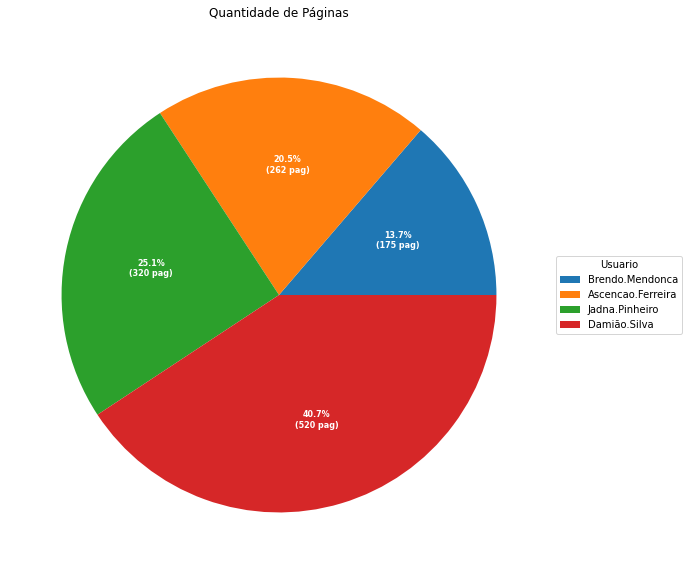

In [79]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

Dados_Completo = ["175 pag Brendo.Mendonca",
          "262 pag Ascencao.Ferreira",
          "320 pag Jadna.Pinheiro",
          "520 pag Damião.Silva"]

User = [float(x.split()[0]) for x in Dados_Completo]
Npaginas = [x.split()[-1] for x in Dados_Completo]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} pag)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(User, autopct=lambda pct: func(pct, User),
                                  textprops=dict(color="w"))

ax.legend(wedges, Npaginas,
          title="Usuario",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantidade de Páginas")

plt.show()